In [4]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
# loading data
data = pd.read_csv('train.csv',
                   header=None, names = range(30))
test = pd.read_csv('test.csv',
                   header=None, names = range(30))
# getting some info about dataframe
y = pd.read_csv('train-target.csv',
                   header=None, names=['a'])

In [ ]:
X, y, Xtest = data.values, y.values, test.values

In [ ]:
print(X, y, Xtest)

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('logit', LogisticRegression(solver='lbfgs' ))])

def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)


def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=degree)), 
                           ('sgd_logit', SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha, max_iter=5))])
    N_train, val_train, val_test = learning_curve(logit_pipe,
                                                  X, y, train_sizes=train_sizes, cv=5,
                                                  scoring='roc_auc')
    plt.figure(figsize=(18,10))
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('AUC')
    plt.legend()
    plt.grid(True);

plot_learning_curve(degree=2, alpha=0.1)

NameError: name 'X' is not defined

In [18]:
X = data.drop(9, axis=1)
print(X)

              0           1           2           3          4           5   \
0    -220.530530  -70.197440  119.035181   20.711737  -6.152986   52.225051   
1      -8.536541   -8.305435 -117.828269  -28.588333  14.223240  -42.087807   
2     126.229973  133.463504 -105.511797 -149.110267  -3.673355 -104.302244   
3     369.571563   11.850181 -299.969407   29.371721  -3.457523 -115.901854   
4     -99.563708  -85.166292  -73.363391  -35.357907   5.437025  -54.892519   
...          ...         ...         ...         ...        ...         ...   
9995  -91.804097   96.380816  -93.520627   85.282425  -7.178058  -58.349354   
9996 -232.083597  -60.861115   45.472736    5.731012  -7.987843   39.012270   
9997 -182.455289  -73.963540 -221.763797  -96.181654  -4.056096 -121.460703   
9998 -268.344148   53.342079 -176.197832   45.925889   9.604607   59.329437   
9999 -766.308667 -136.240073   26.516587 -153.518440  -6.515163   86.701607   

              6           7           8           1

In [24]:
from sklearn import svm

data = pd.read_csv('train.csv',
                   header=None, names = range(30))
test = pd.read_csv('test.csv',
                   header=None, names = range(30))
# getting some info about dataframe
y = pd.read_csv('train-target.csv',
                   header=None, names=['a'])

X, y, Xtest = data.drop([9,15,16],axis=1).values, y.values, test.drop([9,15,16],axis=1).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

logit_pipe = Pipeline([('scaler', StandardScaler()), 
                           ('lr_logit', LogisticRegression())])

clf = logit_pipe.fit(X_train,y_train)
print(y_train.size, y_test.size)

print("Accuracy on training set:", 
      round(logit_pipe.score(X_train, y_train), 3))

print("Accuracy on test set:", 
      round(logit_pipe. score(X_test, y_test), 3))

score = roc_auc_score(y_test, logit_pipe.predict_proba(X_test)[:,1])
print("AUC ROC: ",score)

9000 1000
Accuracy on training set: 0.828
Accuracy on test set: 0.827
AUC ROC:  0.8903051928028802


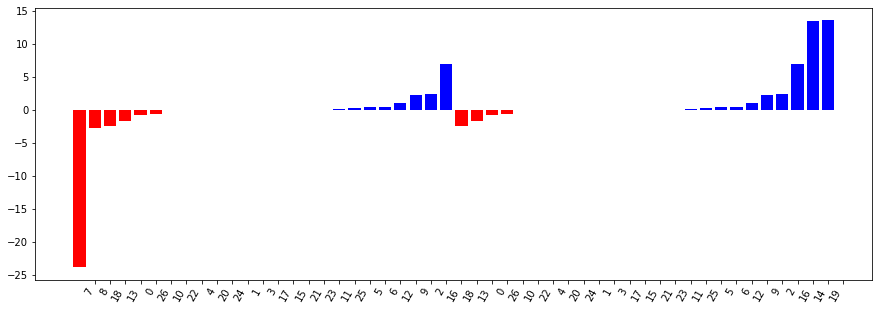

In [26]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

visualize_coefficients(logit_pipe['lr_logit'], range(30))

In [ ]:
print(y_test, logit_pipe.predict(X_test))

In [25]:
test_target = logit_pipe.predict_proba(Xtest)
print(test_target, test_target[:,1].size)
np.savetxt('test-target.csv',test_target[:,1], fmt='%.15f', delimiter='\n')

[[3.97134309e-03 9.96028657e-01]
 [5.30564660e-06 9.99994694e-01]
 [1.71433978e-11 1.00000000e+00]
 ...
 [1.58095759e-13 1.00000000e+00]
 [1.00000000e+00 6.96101408e-13]
 [9.99999776e-01 2.24255585e-07]] 2000


In [ ]:
print(test_target)
print(test_target[:,1].size)
np.savetxt('test-target.csv',test_target[:,1], fmt='%.15f', delimiter='\n')

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
calibrator = CalibratedClassifierCV(clf, cv='prefit')
model=calibrator.fit(X_train, y_train)

test_target = model.predict_proba(Xtest)
print(test_target[:,1].size)
np.savetxt('test-target.csv',test_target[:,1], fmt='%.15f', delimiter='\n')

In [ ]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
#pd.set_option('display.mpl_style', 'default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Vernada' # Ubuntu

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

# чтобы был русский шрифт
from matplotlib import rc
 
font = {'family': 'Vernada', #Droid Sans
        'weight': 'normal'}
rc('font', **font)


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

class DjStacking(BaseEstimator, ClassifierMixin):  
    """Стэкинг моделей scikit-learn"""

    def __init__(self, models, ens_model):
        """
        Инициализация
        models - базовые модели для стекинга
        ens_model - мета-модель
        """
        self.models = models
        self.ens_model = ens_model
        self.n = len(models)
        self.valid = None
        
    def fit(self, X, y=None, p=0.25, cv=3, err=0.001, random_state=None):
        """
        Обучение стекинга
        p - в каком отношении делить на обучение / тест
            если p = 0 - используем всё обучение!
        cv  (при p=0) - сколько фолдов использовать
        err (при p=0) - величина случайной добавки к метапризнакам
        random_state - инициализация генератора
            
        """
        if (p > 0): # делим на обучение и тест
            # разбиение на обучение моделей и метамодели
            train, valid, y_train, y_valid = train_test_split(X, y, test_size=p, random_state=random_state)
            
            # заполнение матрицы для обучения метамодели
            self.valid = np.zeros((valid.shape[0], self.n))
            for t, clf in enumerate(self.models):
                clf.fit(train, y_train)
                self.valid[:, t] = clf.predict(valid)
                
            # обучение метамодели
            self.ens_model.fit(self.valid, y_valid)
            
        else: # используем всё обучение
            
            # для регуляризации - берём случайные добавки
            self.valid = err*np.random.randn(X.shape[0], self.n)
            
            for t, clf in enumerate(self.models):
                # это oob-ответы алгоритмов
                self.valid[:, t] += cross_val_predict(clf, X, y, cv=cv, n_jobs=-1, method='predict')
                # но сам алгоритм надо настроить
                clf.fit(X, y)
            
            # обучение метамодели
            self.ens_model.fit(self.valid, y)  
            

        return self
    


    def predict(self, X, y=None):
        """
        Работа стэкинга
        """
        # заполение матрицы для мета-классификатора
        X_meta = np.zeros((X.shape[0], self.n))
        
        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict(X)
        
        a = self.ens_model.predict(X_meta)
        
        return (a)